# Objective:-Predict the delivery time using sorting time

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sns

In [2]:
data=pd.read_csv("D:\Data sets\delivery_time.csv")

In [3]:
data.head(1)
##Exploratory data analysis and Plots

,Delivery Time,Sorting Time
0,21.0,10


In [4]:
data.rename(columns={"Delivery Time":"dt","Sorting Time":"st"},inplace=True) ##Change the sort name 
data.head(1)

,dt,st
0,21.0,10


In [5]:
data.info() ##Null value not present in data & all data types is appropriate

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   dt      21 non-null     float64
 1   st      21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


C:\Users\Umanshu Mittal\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='dt', ylabel='Density'>

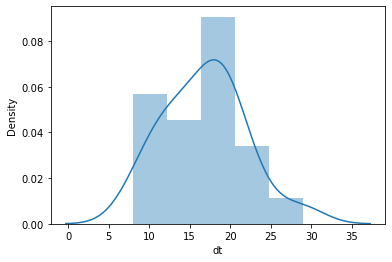

In [6]:
sns.distplot(data.dt)

C:\Users\Umanshu Mittal\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='st', ylabel='Density'>

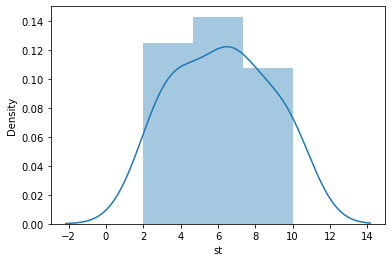

In [7]:
sns.distplot(data.st)

<AxesSubplot:>

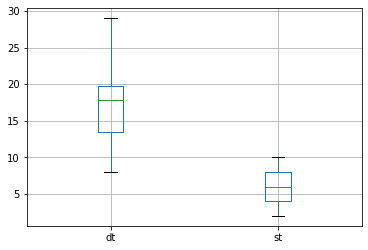

In [8]:
data[['dt','st']].boxplot() ## Outlier not present in data

<AxesSubplot:xlabel='st', ylabel='dt'>

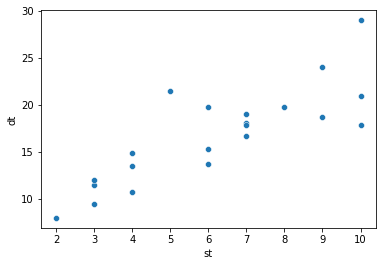

In [9]:
sns.scatterplot(x='st', y='dt', data=data) ##Scatter plot

In [10]:
# Correlation coefficient value for Delivery Time and Sorting Time
data.corr()
# If |r| is greater than  0.85 then Co-relation is Strong(Correlation Co-efficient = 0.8259973). 
# This has a moderate Correlation 

,dt,st
dt,1.000000,0.825997
st,0.825997,1.000000


<AxesSubplot:>

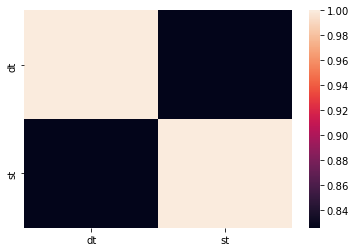

In [11]:
sns.heatmap(data.corr())

# Model1
**We will create simple model without using any transformation**

In [12]:
model1=smf.ols('dt~st',data=data).fit()

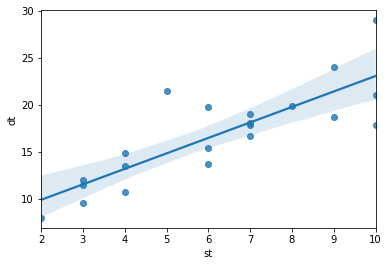

In [13]:
sns.regplot(x='st', y='dt', data=data)
plt.show()

In [14]:
model1.params

Intercept    6.582734
st           1.649020
dtype: float64

In [15]:
(model1.tvalues,"\n",model1.pvalues) ##Pvalues is less then 0.05(0.00115) then it is significant

(Intercept    3.823349
 st           6.387447
 dtype: float64,
 '\n',
 Intercept    0.001147
 st           0.000004
 dtype: float64)

In [16]:
model1.summary()
# The R-Squared Value is 0.682 which is lesser than 0.8(In General)
# Adjusted R-Squared Value is 0.6655 
# The Probability Value for F-Statistic is 3.98e-06(Overall Probability Model is also less than 0.05)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     dt   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Fri, 15 Jan 2021   Prob (F-statistic):           3.98e-06
Time:                        23:28:18   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
st             1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
import numpy as np
df_st=data.iloc[:,1]  

model1.predict(df_st) # Best fit line 
#Predicted delivery time by using sorting time

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

In [18]:
print(model1.conf_int(0.05)) #95% confidence interval
# This code will get us 2 equations 
# 1 to caliculate the lower range and other for upper range

                  0          1
Intercept  2.979134  10.186334
st         1.108673   2.189367


# ( Model2)

# Adjusted R-squared value for the model1 is 0.6655 

# we may have to do transformation of variables for better R-squared value
# Applying transformations

# Logarthmic transformation
# Regression using logarthmic transformation


In [19]:
model2=smf.ols('dt~np.log(st)',data=data).fit()

In [20]:
model2.params

Intercept     1.159684
np.log(st)    9.043413
dtype: float64

In [21]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     dt   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Fri, 15 Jan 2021   Prob (F-statistic):           2.64e-06
Time:                        23:28:18   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(st)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
(model2.tvalues,'\n',model2.pvalues)

(Intercept     0.472460
 np.log(st)    6.586789
 dtype: float64,
 '\n',
 Intercept     0.641980
 np.log(st)    0.000003
 dtype: float64)

In [23]:
df1_st=data.iloc[:,1]
model2.predict(df1_st)
# Best fit line 
#Predicted delivery time by using sorting time

0     21.982913
1     13.696517
2     17.363305
3     21.030094
4     21.982913
5     17.363305
6     18.757354
7     11.094889
8     21.982913
9     21.030094
10    19.964933
11    13.696517
12    18.757354
13    11.094889
14    11.094889
15    13.696517
16    17.363305
17    18.757354
18     7.428100
19    18.757354
20    15.714496
dtype: float64

In [24]:
print(model2.conf_int(0.05))

                  0          1
Intercept  -3.97778   6.297147
np.log(st)  6.16977  11.917057


# (Model3)
# R-squared value for the model2 is 0.6954
# Adjusted R-squared:  0.6794 

# we may have to do different transformation for a better R-squared value
# Applying different transformations

# Exponential model

In [25]:
data=pd.read_csv("D:\Data sets\delivery_time.csv")
data.rename(columns={"Delivery Time":"dt","Sorting Time":"st"},inplace=True)

In [26]:
import numpy as np
model3=smf.ols('np.log(dt)~st',data=data).fit()

In [27]:
model3.params

Intercept    2.121372
st           0.105552
dtype: float64

In [28]:
model3.summary()
# R-squared value - 0.7109
# Adjusted R SQuare Value - 0.6957 
# Higher the R-sqaured value - Better chances of getting good model for Delivery Time and Sorting Time

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.log(dt)   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     46.73
Date:                Fri, 15 Jan 2021   Prob (F-statistic):           1.59e-06
Time:                        23:28:18   Log-Likelihood:                 7.7920
No. Observations:                  21   AIC:                            -11.58
Df Residuals:                      19   BIC:                            -9.495
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1214      0.103     20.601      0.000       1.906       2.337
st             0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
(model3.tvalues,'\n',model3.pvalues)

(Intercept    20.601357
 st            6.836088
 dtype: float64,
 '\n',
 Intercept    1.857343e-14
 st           1.592708e-06
 dtype: float64)

In [36]:
df3_st=data.iloc[:,1]

pred=np.exp(model3.predict((df3_st)))

In [37]:
np.sqrt(np.mean((data.dt-pred)**2)) ##Error also less in this model

2.940250323056201

In [ ]:
#

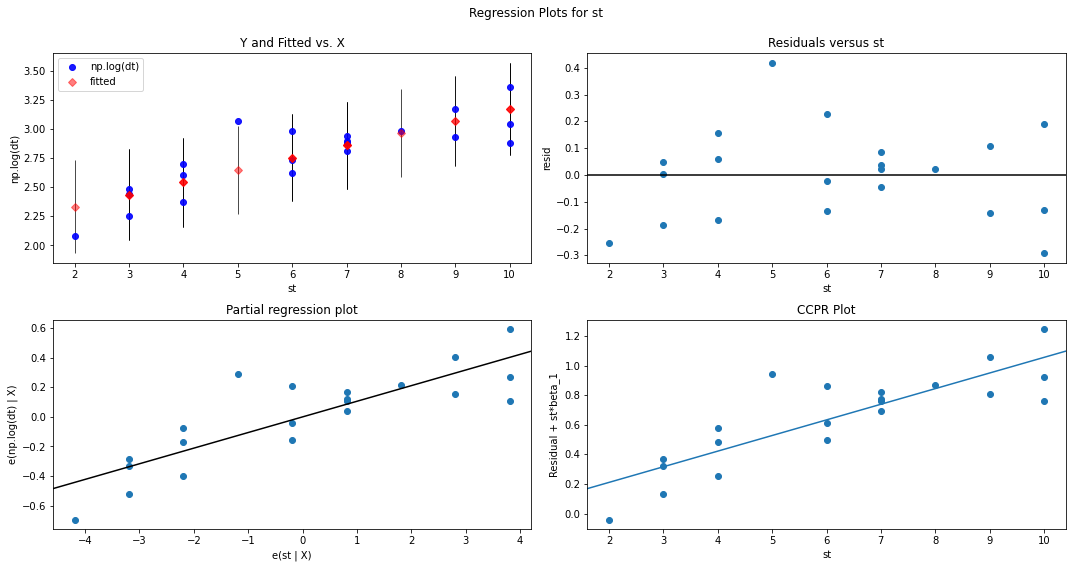

In [38]:
import statsmodels.api as sm
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model3, "st", fig=fig)
plt.show()

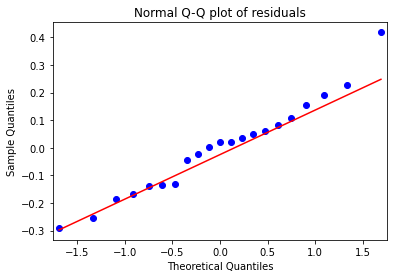

In [39]:
qqplot=sm.qqplot(model3.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

# Conclusion:-Model3(exponential transformation)  is best model because
# R-squared value - 0.7109 is higher than other model
# Adjusted R SQuare Value - 0.6957 also higher than other model
# Higher the R-sqaured value - Better chances of getting good model for Delivery Time and Sorting Time

